# Algoritmos em Grafos
### GCC218 - 2019/02  
### Trabalho Final de Algoritmos em Grafos  
Grupo:  

   Davi Horner, 10A, 201720368  
   Lucas Neves, 14A, 201720357  
   Thiago Luigi, 10A, 201720364  
   

## Tabela de Conteúdo  

- [Descrição do Trabalho](#Descrição-do-Trabalho)
- [O Programa](#O-Programa)
- [Import das bibliotecas](#Import-das-bibliotecas)  
- [Classe que representa os vértices](#Classe-que-representa-os-vértices)  
- [Classe que representa o grafo](#Classe-que-representa-o-grafo)  
- [Função que escreve o arquivo de saída](#Função-que-escreve-o-arquivo-de-saída)  
- [Main](#Main)
- [Execução do Programa](#Execução-do-programa)

## Descrição do Trabalho  

O planejamento de horários em instituições de ensino constitui um desafio para diretores e coordenadores pedagógicos. De fato, trata-se de uma tarefa passível a erros, devido ao seu caráter combinatório, e que exige demasiado tempo de elaboração. O problema consiste em designar horários a turmas já pré-estabelecidas, levando em conta as seguintes restrições obrigatórias:  

- Não é permitida a alocação de duas aulas para um mesmo professor no mesmo horário  
- Não pode haver duas aulas para uma mesma turma no mesmo horário  
- Todas as aulas devem ser alocadas ao longo dos dias de funcionamento da escola e turnos de aula pré-determinados  
- Professores não devem ser alocados em horários nos quais eles não podem estar presentes  

Algumas características são consideradas desejáveis, variando de acordo com as recomendações pedagógicas e de cunho pessoal. Tais particularidades são listadas a seguir:  

- Uma mesma turma não deverá ter três ou mais aulas geminadas da mesma disciplina, em horários sequenciais  
- Não deverá haver horários de aula separados por grandes janelas entre aulas, para uma mesma turma  
- Deve-se buscar atender às preferências de cada professor em relação a dias ou horários em que possa lecionar  

A atividade em questão pode ser automatizada e nós do curso de algoritmos em grafos fomos convocados para auxiliar os responsáveis para a elaboração de horários.

### Objetivo  

O nosso objetivo é desenvolver um algoritmo eficiente que encontre a distribuição de horários para cada turma, minimizando o número de restrições desejáveis não atendidas. Para tanto, implementaremos uma abordagem baseada em ​coloração de vértices​.  


## O Programa  

Algumas observações acerca do trabalho:  
- Programa desenvolvido para Python 3.x  
- Necessário instalar o módulo xlrd  


Nosso programa foi desenvolvido em python com a versão 3 em mente e não foi testado na versão 2 pois é uma versão antiga que cairá em desuso em breve.  

Como o arquivo de entrada que nos foi cedido possui o formato .xlsx é necessário instalar o módulo xlrd para que possa ser feita a leitura das planilhas fornecidas. Para instalá-lo é simples, caso seu ambiente possua a versão 2.x e 3.x do Python use `pip3 install xlrd` para garantir que instalou para a versão 3.x do python.  
  
  
>O código disponível neste relatório estará levemente modificado em relação ao código enviado para o professor pois aqui terá mais código que será utilizado na ilustração do relatório.  
  
  
A ideia do programa é a seguinte:  

- Cada combinação *Matéria-Professor-Turma* forma um vértice  
  
  
![imagem_vertice](resources/Vertice.png "Ilustração do Vértice")  
  
  
- Os vértices são, então, inseridos em um grafo. A priori todos os vértices são desconexos mas a medida que ocorre a primeira ou a segunda restrição eles vão sendo ligados por arestas. Esta ligação se dá devido ao fato de que vamos utilizar uma abordagem de coloração de vértices. Na coloração de vértices os vizinhos não podem ter a mesma cor, ou seja, os vizinhos aqui não podem ter o mesmo horário. Relembrando as restrições são:  

 - Um professor não pode estar em dois lugares ao mesmo tempo  
 - Uma turma não pode ter duas aulas ao mesmo tempo  
  
  
- O grafo é então colorido utilizando o algoritmo DSATUR  

- Cada cor é um horário  
  
![tabela_cor_horario](resources/Tabela_cor_horario.png "Ilustração do esquema de horário/cor")  
  
 - Este exemplo ilustra o horário de uma turma em específico caso só houvessem aulas diferentes. Como num ambiente real há aulas repetidas seriam utilizados menos cores e as cores se repetiriam ao decorrer do dia e da semana, respeitando as preferências.





### Import das bibliotecas

In [1]:
import xlrd
from tabulate import tabulate
import time
import matplotlib.pyplot as plt
import numpy as np

### Classe que representa os vértices

In [2]:
class Vertice:
    def __init__(self, indice, materia, professor, turma):
        self.indice = indice
        self.materia = materia
        self.professor = professor
        self.turma = turma
        self.adjacentes = []
        self.cor = -1

    def adicionar_adjacente(self, adjacente):
        self.adjacentes.append(adjacente)

    # Retorna o grau do vertice
    def get_grau(self):
        return len(self.adjacentes)

    # Retorna o grau de saturacao do vertice
    # A saturacao eh o numero de diferentes cores para qual o vertice eh adjacente
    def get_saturacao(self):
        saturacao = 0
        for adjacente in self.adjacentes:
            if adjacente.cor is not -1:
                saturacao += 1
        return saturacao

    def menor_cor_disponivel(self, horarios, restricoes):
        # A menor cor comeca com zero
        menor = 0
        # Ordena os adjacentes por cor para melhorar a eficiente da busca de cores
        self.adjacentes.sort(key=lambda vertice: vertice.cor)
        # Passa por todos os vertices adjacentes verificando as cores
        for vertice in self.adjacentes:
            if vertice.cor == menor:
                menor += 1
                # Verifica se a cor esta dentro dos horarios disponiveis
                if (menor >= len(horarios)):
                    menor = 0
        # return horarios[menor]
        return menor

    # Metodo que verifica a proxima menor cor disponivel
    def proxima_cor_disponivel(self, horarios):
        # A cor comeca com zero
        proxima = 0
        # Ordena os adjacentes por cor para melhorar a eficiente da busca de cores
        self.adjacentes.sort(key=lambda vertice: vertice.cor)
        # Passa por todos os vertices adjacentes verificando as cores
        for adjacente in self.adjacentes:
            # Se a cor do vertice for igual a cor do vertice adjacente, seleciona
            # a proxima cor
            if proxima == adjacente.cor:
                proxima += 1
                # Se a cor for igual a cor inicial do vertice (cor indisponivel)
                # seleciona a proxima cor
                if proxima == self.cor:
                    proxima += 1
            # Verifica se a cor esta dentro dos horarios disponiveis
            if (proxima >= len(horarios)):
                proxima = 0
        # Retorna a cor
        return proxima
        # return horarios[proxima]

    # Metodo que verifica se eh possivel atender a preferencia do professor
    def verificar_preferencia(self, cor):
        # Passa por todos os vertices adjacentes verificando se eh possivel mudar
        # a cor do vertice em questao
        for adjacente in self.adjacentes:
            if adjacente.cor == cor:
                # Retorna falso
                return False
        # Muda a cor
        self.cor = cor
        # Retorna verdadeiro
        return True

    def __str__(self):
        return "Vertice " + str(self.indice) + " =>" + " Materia: " + str(self.materia) + " Professor: " + str(self.professor) + " Turma: " + str(self.turma)

### Classe que representa o grafo

In [3]:
class Grafo:
    def __init__(self, nome_arquivo, nome_escola):
        # Lista que armazena os vertices do grafo
        self.vertices = []
        # Lista que armazena as horas disponiveis para aula por dia
        self.horas = []
        # Lista que armazena os horarios disponiveis para aula por semana
        self.horarios = []
        # Dicionario que armazena as restricoes de horarios dos professores
        self.restricoes_professores = {}
        # Dicionario que armazena as restricoes de horarios das turmas
        self.restricoes_turmas = {}
        # Dicionario que armazena as preferencias de horarios dos professores
        self.preferencias_professores = {}
        # Dicionario que armazena a quantidade de preferenciais atendidas para
        # cada professor
        self.preferenciais_atendidas = {}
        # Variavel para guardar a quantidade de vertices coloridos
        self.vertices_coloridos = 0
        # Nome da escola para imprimir no resultado
        self.nome_escola = nome_escola
        # Metodo que realiza a leitura do arquivo
        self.ler_arquivo(nome_arquivo)
        # Variavel que para armazenar a quantidade de vertices nao coloridos
        self.quantidade_vertices_nao_coloridos = len(self.vertices)
        # Metodo que verifica todas as restricoes
        self.verificar_restricoes()
        # Tempo inicial
        inicio = time.time()
        # Metodo que colere o grafo
        self.dsatur()
        # Metodo que verifica se as cores (horarios) estao de acordo com as
        # restricoes dos professores
        self.verificar_restricoes_professores()
        # Metodo que verifica se existe tres ou mais aulas geminadas
        # self.verificar_geminadas()
        # Metodo que verifica se existe grande janelas de horarios para uma turma
        # self.verificar_janelas()
        # Metodo que verifica as preferencias dos professores
        self.verificar_preferencias()
        # Tempo final
        fim = time.time()
        # Variavel que armazena o tempo de execucao do algoritmo
        self.tempo_iteracao = fim - inicio
        # Variavel que armazena a quantidade de cores usadas
        # Como existe a cor zero, a quantidade de cores sera o valor sucessor
        # ao valor relativo a maior cor
        self.quantidade_cores = max(self.vertices, key =  lambda vertice: vertice.cor).cor + 1
        self.imprimir_terminal()
        # Teste
        # print("Limite: {}".format(len(self.horarios)))
        # self.imprimir()

    def ler_arquivo(self, nome_arquivo):
        planilha = xlrd.open_workbook(nome_arquivo)
        self.ler_dados(planilha)
        self.ler_configuracoes(planilha)
        self.ler_restricoes_professores(planilha)
        self.ler_restricoes_turma(planilha)
        self.ler_preferencias(planilha)

    def ler_dados(self, planilha):
        # Pega a primeira aba da planilha
        aba = planilha.sheet_by_index(0)
        # Loop para leitura das linhas
        for i in range(aba.nrows):
            if i != 0:
                valores = aba.row_values(i)
                # Pega a letra relativa a materia
                materia = valores[0]
                # Pega o numero relativo a turma
                turma = valores[1]
                # Pega o numero relativo ao professor
                professor = valores[2]
                # Pega a quantidade de aulas
                quantidade_aulas = int(valores[3])
                # Adiciona o vertice com as informacoes coletas nessa linha da aba.
                # Cada aula eh representada por um vertice. Se existe uma materia A
                # que eh ministrada por um professor 1 para uma turma B que possui
                # 3 aulas, 3 vertices seram adicionados para representar cada uma
                # das aulas.
                for i in range(quantidade_aulas):
                    vertice = Vertice(len(self.vertices), materia, professor, turma)
                    self.adicionar_vertice(vertice)

    def ler_configuracoes(self, planilha):
        # Pega a segunda aba da planilha
        # Nessa aba, estao as horas disponiveis nos dias
        aba = planilha.sheet_by_index(1)
        # Loop para leitura das linhas
        for i in range(aba.nrows):
            if i != 0:
                valores = aba.row_values(i)
                # Pega a hora dessa linha da aba
                hora = float(valores[0])
                # Adiciona a hora a lista de horas
                self.adicionar_hora(hora)
        self.criacao_cores()

    def ler_restricoes_professores(self, planilha):
        # Pega a terceira aba da planilha
        # Essa aba estao as restricoes de horarios de cada professor
        aba = planilha.sheet_by_index(2)
        # Loop para leitura das linhas
        for i in range(aba.nrows):
            if i != 0:
                valores = aba.row_values(i)
                # Pega o numero relativo ao professor
                professor = valores[0]
                # Pega a hora da preferencia de horario
                hora = float(valores[1])
                # Pega o dia da preferencia de horario
                dia = str(valores[2])
                self.adicionar_restricoes_professores(professor, hora, dia)

    def ler_restricoes_turma(self, planilha):
        # Pega a quarta aba da planilha
        # Nessa aba tem as restricoes de horarios de cada turma
        aba = planilha.sheet_by_index(3)
        # Loop para leitura das linhas
        for i in range(aba.nrows):
            if i != 0:
                valores = aba.row_values(i)
                # Pega o numero relativo a turma
                turma = valores[0]
                # Pega a hora da preferencia de horario
                hora = float(valores[1])
                # Pega o dia da preferencia de horario
                dia = valores[2].encode('utf-8')
                self.adicionar_restricoes_turmas(turma, hora, dia)

    def ler_preferencias(self, planilha):
        # Pega a quinta aba da planilha
        # Essa aba estao as preferencias de horarios de cada professor
        aba = planilha.sheet_by_index(4)
        # Loop para leitura das linhas
        for i in range(aba.nrows):
            if i != 0:
                valores = aba.row_values(i)
                # Pega o numero relativo ao professor
                professor = valores[0]
                # Pega a hora da preferencia de horario
                hora = float(valores[1])
                # Pega o dia da preferencia de horario
                dia = str(valores[2])
                self.adicionar_preferencias_professores(professor, hora, dia)

    def adicionar_vertice(self, vertice):
        self.vertices.append(vertice)

    def adicionar_hora(self, hora):
        self.horas.append(hora)

    def criacao_cores(self):
        dias = ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"]

        for dia in dias:
            for hora in self.horas:
                self.adicionar_horario(hora, dia)

    def adicionar_horario(self, hora, dia):
        self.horarios.append([hora, dia])

    def adicionar_restricoes_professores(self, professor, hora, dia):
        if professor in self.restricoes_professores:
            self.restricoes_professores.get(professor).append([hora, dia])
        else:
            self.restricoes_professores[professor] = []
            self.restricoes_professores[professor].append([hora, dia])

    def adicionar_restricoes_turmas(self, turma, hora, dia):
        if turma in self.restricoes_turmas:
            self.restricoes_turmas.get(turma).append([hora, dia])
        else:
            self.restricoes_turmas[turma] = []
            self.restricoes_turmas[turma].append([hora, dia])

    def adicionar_preferencias_professores(self, professor, hora, dia):
        if professor in self.preferencias_professores:
            self.preferencias_professores.get(professor).append([hora, dia])
        else:
            self.preferencias_professores[professor] = []
            self.preferencias_professores[professor].append([hora, dia])

    def adicionar_preferencias_atendidas(self, professor):
        if professor in self.preferenciais_atendidas:
            # Se o professor ja tem preferencias atendidas, incrementa o valor
            self.preferenciais_atendidas[professor] = self.preferenciais_atendidas.get(professor) + 1
        else:
            # Se essa eh a primeira preferencia atendida do professor, atribui
            # o valor 1
            self.preferenciais_atendidas[professor] = 1

    def verificar_restricoes(self):
        for vertice1 in self.vertices:
            for vertice2 in self.vertices:
                if vertice1 != vertice2:
                    # Verifica se os vertices possuem um mesmo professor
                    # Seguindo o que o enunciado do trabalho fala: nao eh permitida
                    # a alocacao de duas aulas com o mesmo professor no mesmo horario
                    if vertice1.professor == vertice2.professor:
                        self.adicionar_aresta(vertice1, vertice2)
                    # Verifica se os vertices possuem uma mesma turma
                    # Seguindo o que o enunciado do trabalho fala: nao eh permitida
                    # a alocacao de duas aulas para a mesma turma no mesmo horario
                    if vertice1.turma == vertice2.turma:
                        self.adicionar_aresta(vertice1, vertice2)

    def adicionar_aresta(self, vertice1, vertice2):
        vertice1.adicionar_adjacente(vertice2)
        vertice2.adicionar_adjacente(vertice1)

    # Realiza a coloracao aplicando o Algoritmo Dsatur
    def dsatur(self):
        # Copia a lista de vertices para realizar a coloracao
        lista_para_colorir = self.vertices.copy()
        # Ordena em ordem decrescente a lista que sera usada na coloracao
        lista_para_colorir.sort(key=lambda vertice: vertice.get_grau(), reverse=True)
        # Atribui a cor 0 para o vertice de maior grau
        lista_para_colorir[0].cor = 0
        # Decrementa a variavel que armazena a quantidade de vertices nao coloridos
        self.quantidade_vertices_nao_coloridos -= 1
        # Remove o vertice colorido da lista
        lista_para_colorir.pop(0)
        # Executa o algoritmo enquanto a lista com os vertices para colorir nao
        # esteja vazia
        while lista_para_colorir:
            # Seleciona o proximo vertice para colorir
            proximo = self.proximo_vertice(lista_para_colorir)
            # Colore o vertice com a menor cor disponivel
            proximo.cor = proximo.menor_cor_disponivel(self.horarios, self.restricoes_professores)
            # Decrementa a variavel que armazena a quantidade de vertices nao coloridos
            self.quantidade_vertices_nao_coloridos -= 1
            # Remove o vertice colorido da lista
            lista_para_colorir.remove(proximo)

    def proximo_vertice(self, lista_vertices):
        saturacoes = {}
        graus = {}
        for vertice in lista_vertices:
            saturacoes[vertice] = vertice.get_saturacao()
            graus[vertice] = vertice.get_grau()
        if len(saturacoes):
            # Seleciona a maior (ou maiores) saturacao (ou saturacoes)
            # Se tiver mais de um vertice com a maior saturacao, o vertice com
            # maior grau eh selecionado
            maior_saturacao = max(saturacoes.values())
            maiores_saturacao = {v: saturacao for v, saturacao in graus.items() if saturacoes[v] == maior_saturacao}
            # Retorna o vertice com maior grau dos vertices com maiores saturacao
            return max(maiores_saturacao, key = maiores_saturacao.get)

    # Imprime os resultados do algoritmo como solicitado no enunciado do trabalho
    def imprimir_terminal(self):
        print("{}:".format(self.nome_escola))
        print("Quantidade de cores: {}".format(self.quantidade_cores))
        print("Preferências atendidas pelo total de preferências: {}".format(0))
        conflito = 0
        for vertice in self.vertices:
            for adjacente in vertice.adjacentes:
                if vertice.cor == adjacente.cor:
                    conflito += 1
        print("Conflito: {}".format(conflito))

    # Retornar os dados que devem ser escritos no arquivo
    def retornar_dados_arquivo(self):
        return [self.nome_escola, self.quantidade_cores, self.tempo_iteracao, self.quantidade_vertices_nao_coloridos, self.preferenciais_atendidas]

    # Metodo que verifica se as cores (horarios) estao de acordo com as restricoes
    # dos professores
    def verificar_restricoes_professores(self):
        for vertice in self.vertices:
            # Verifica se o professor tem alguma restricao
            if vertice.professor in self.restricoes_professores:
                # Para cada restricao do professor, verifica se a restricao
                # entra em conflito com a cor do vertice
                for restricao in self.restricoes_professores.get(vertice.professor):
                    # Compara a restricao com o horario relativo a cor atual
                    if restricao[0] == self.horarios[vertice.cor][0] and restricao[1] == self.horarios[vertice.cor][1]:
                        vertice.proxima_cor_disponivel(self.horarios)

    # Metodo que verifica se existe tres ou mais aulas geminadas
    # def verificar_geminadas(self):
    #     aulas_por_dia = len(self.horarios) / 5
    #
    #     for vertice1 in self.vertices:
    #         for vertice2 in self.vertices:
    #             for vertice3 in self.vertices:
    #                 if vertice1 != vertice2 and vertice2 != vertice3:
    #                     if

    # Metodo que verifica se existe grande janelas de horarios para uma turma
    # def verificar_janelas(self):

    # Metodo que verifica as preferencias dos professores
    def verificar_preferencias(self):
        for vertice in self.vertices:
            if vertice.professor in self.preferencias_professores:
                for preferencia in self.preferencias_professores.get(vertice.professor):
                    if preferencia in self.horarios:
                        if vertice.verificar_preferencia(self.horarios.index(preferencia)):
                            self.adicionar_preferencias_atendidas(vertice.professor)


    # Imprime o grafo para testes
    def imprimir(self):
        table = []
        for x in self.vertices:
            table.append(['Turma: {}'.format(x.turma) , 'Matéria: {}'.format(x.materia), x.professor, x.cor])
            # table.append(['Turma: {}'.format(x.turma) , 'Matéria: {}'.format(x.materia), x.professor, self.horarios[x.cor]])
        print(tabulate(table, headers=["Turma", "Matéria", "Professor", "Hora/Cor" ], tablefmt="fancy_grid"))

### Função que escreve o arquivo de saída

In [4]:
# Metodo que escreve o resultado no arquivo
# O metodo usa uma lista (lista 1) com os dados
# Em cada posicao da lista dados tem um lista (lista 2) com os dados de uma escola
#   Na posicao 0 da lista 2, esta o nome da escola
#   Na posicao 1 da lista 2, esta a quantidade de horarios (ou cores) utilizada
#       na coloracao
#   Na posicao 2 da lista 2, esta o tempo (em segundos) do tempo que o algoritmo
#       levou para ser executado
#   Na posicao 3 da lista 2, esta a quantidade de vertices nao lidos
#   Na posicao 4 da lista 2, esta uma lista 3 com as preferencis atendidas para
#       para cada professor
#       Em cada posicao da lista 3, tem uma tupla com o identificador do
#           # professor e a quantidade de preferencias atendidas
def escrever_arquivo(dados, nome_arquivo):
    # Abre o arquivo para escrita
    # Se o arquivo existe, ele apaga os dados e escreve por cima
    # Se o arquivo nao existe, um arquivo vazio eh criado
    arquivo = open(nome_arquivo, 'w')
    arquivo.write("Resultados:\n")
    arquivo.write("Quantidade de horarios utilizadas (cores):\n")
    # Salva no arquivo a quantidade de horario utilizada por cada escola
    for dado in dados:
        arquivo.write("{}: {}\n".format(dado[0], dado[1]))
    arquivo.write("Tempo para iteracao do algoritmo (em segundos):\n")
    # Salva no arquivo o tempo gasto por cada algoritmo
    for dado in dados:
        arquivo.write("{}: {}\n".format(dado[0], dado[2]))
    arquivo.write("Quantidade de vertices nao coloridos:\n")
    # Salva no arquivo a quantidade de vertices noa coloridos
    for dado in dados:
        arquivo.write("{}: {}\n".format(dado[0], dado[3]))
    arquivo.write("Quantidade de preferencias nao atendidas para cada professor (somente dos professores que possuem preferencias):\n")
    # Salva no arquivo a quantidade de preferencias atendidas por cada professor
    # (somente se o professor tiver preferencias) em cada escola
    for dado in dados:
        # Salva o nome da escola
        arquivo.write("{}:\n".format(dado[0]))
        if dado[4]:
            for professor, quantidade in dado[4].items():
                # Salva o nome do professor e a quantidade de preferenciais atendidas
                arquivo.write("{}: {}\n".format(professor, quantidade))
    # Fecha o arquivo
    arquivo.close()

### Main

In [5]:
def main():
    dados = []
    grafo1 = Grafo("../data/Escola_A.xlsx", "Escola A")
    dados.append(grafo1.retornar_dados_arquivo())
    grafo2 = Grafo("../data/Escola_B.xlsx", "Escola B")
    dados.append(grafo2.retornar_dados_arquivo())
    grafo3 = Grafo("../data/Escola_C.xlsx", "Escola C")
    dados.append(grafo3.retornar_dados_arquivo())
    grafo4 = Grafo("../data/Escola_D.xlsx", "Escola D")
    dados.append(grafo4.retornar_dados_arquivo())
    escrever_arquivo(dados, "../data/Resultados.txt")

### Execução do programa

In [6]:
if __name__ == "__main__":
    main()

Escola A:
Quantidade de cores: 30
Preferências atendidas pelo total de preferências: 0
Conflito: 0
Escola B:
Quantidade de cores: 25
Preferências atendidas pelo total de preferências: 0
Conflito: 256
Escola C:
Quantidade de cores: 25
Preferências atendidas pelo total de preferências: 0
Conflito: 0
Escola D:
Quantidade de cores: 25
Preferências atendidas pelo total de preferências: 0
Conflito: 8


### Gráficos

 - Impressão do grafo como uma tabela

In [ ]:
grafo1 = Grafo("../data/Escola_A.xlsx", "Escola A")

grafo1.imprimir()

In [ ]:
grafo2 = Grafo("../data/Escola_B.xlsx", "Escola B")

grafo2.imprimir()

In [ ]:
grafo3 = Grafo("../data/Escola_C.xlsx", "Escola C")

grafo3.imprimir()

In [ ]:
grafo4 = Grafo("../data/Escola_D.xlsx", "Escola D")

grafo4.imprimir()

 - Impressão do gráfico de tempo de execução

Escola A:
Quantidade de cores: 30
Preferências atendidas pelo total de preferências: 0
Conflito: 0
Escola B:
Quantidade de cores: 25
Preferências atendidas pelo total de preferências: 0
Conflito: 256
Escola C:
Quantidade de cores: 25
Preferências atendidas pelo total de preferências: 0
Conflito: 0
Escola D:
Quantidade de cores: 25
Preferências atendidas pelo total de preferências: 0
Conflito: 8


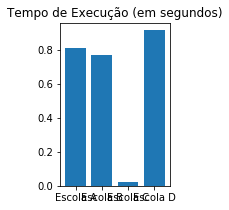

In [53]:
grafo1 = Grafo("../data/Escola_A.xlsx", "Escola A")
grafo2 = Grafo("../data/Escola_B.xlsx", "Escola B")
grafo3 = Grafo("../data/Escola_C.xlsx", "Escola C")
grafo4 = Grafo("../data/Escola_D.xlsx", "Escola D")



names = ['Escola A', 'Escola B', 'Escola C', 'Escola D']
values = [grafo1.tempo_iteracao, grafo2.tempo_iteracao, grafo3.tempo_iteracao, grafo4.tempo_iteracao]

plt.figure(figsize=(9, 3))

plt.subplot(1, 4, 1)
plt.bar(names, values)
plt.title('Tempo de Execução (em segundos)')
plt.show()

- Relatório criado pela execução do programa  

In [ ]:
file = open('../data/Resultados.txt', 'r') 
print(file.read()) 